In [45]:
from correlation import *
from anomaly import get_anomaly_score
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
from gc import collect
import matplotlib.pyplot as plt


In [37]:
path = "./data"

In [38]:
corr_df = pd.read_csv('./correlation.csv')
corr_df.timestamp = pd.to_datetime(corr_df.timestamp)

In [39]:
spy_df = pd.read_csv('data/SPY.csv')
spy_df.timestamp = pd.to_datetime(spy_df.timestamp)

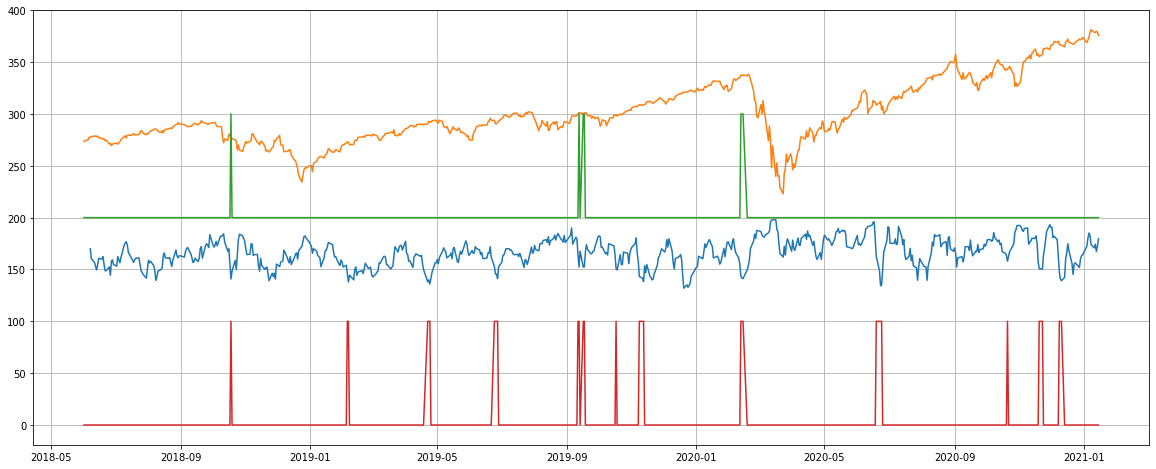

In [94]:
plt.figure(figsize=(20, 8))
begin = datetime(year=2018, month=6, day=1)

corr_year = corr_df[(corr_df.timestamp >= begin)].reset_index(drop=True)
spy_year = spy_df[(spy_df.timestamp >= begin)].reset_index(drop=True)

anomaly_year = get_anomaly_score(corr_year.current_corr, 5, 30)
spy_anomaly_year = get_anomaly_score(spy_year.close, 5, 30)

plt.plot(corr_year.timestamp, corr_year.current_corr.rolling(5).mean()*200)
plt.plot(spy_year.timestamp, spy_year.close)

# This one only shows the an alert when both spy and corr show anomalies
alert_ts = np.zeros(len(corr_year.timestamp))
alert_ts[(anomaly_year <= -2) & ((spy_anomaly_year <= -2) | (spy_anomaly_year >= 2))] = 1
plt.plot(corr_year.timestamp, alert_ts*100 + 200)

# This one shows all corr anomalies
alert_ts[(anomaly_year <= -2)] = 1
plt.plot(corr_year.timestamp, alert_ts*100)

plt.grid()

In [91]:
spy_year.reset_index(drop=True)

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2018-06-01,272.41,273.94,272.3300,273.60,260.705597,71258411,0.0,1.0
1,2018-06-04,274.53,275.19,274.2600,274.90,261.944330,45385166,0.0,1.0
2,2018-06-05,275.05,275.53,274.1800,275.10,262.134904,51135038,0.0,1.0
3,2018-06-06,275.79,277.52,275.0900,277.40,264.326508,62732215,0.0,1.0
4,2018-06-07,277.95,278.28,276.3400,277.37,264.297922,72969402,0.0,1.0
...,...,...,...,...,...,...,...,...,...
657,2021-01-11,377.85,380.58,377.7189,378.69,378.690000,51176719,0.0,1.0
658,2021-01-12,378.89,379.86,376.3600,378.77,378.770000,51440114,0.0,1.0
659,2021-01-13,378.69,380.86,377.8500,379.79,379.790000,44349921,0.0,1.0
660,2021-01-14,380.59,381.13,378.1000,378.46,378.460000,41754491,0.0,1.0
